In [3]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

/Users/muratkucukosmanoglu/anaconda3/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 1024 is greater than input length  = 500, using nperseg = 500
  warnings.warn('nperseg = {0:d} is greater than input length '


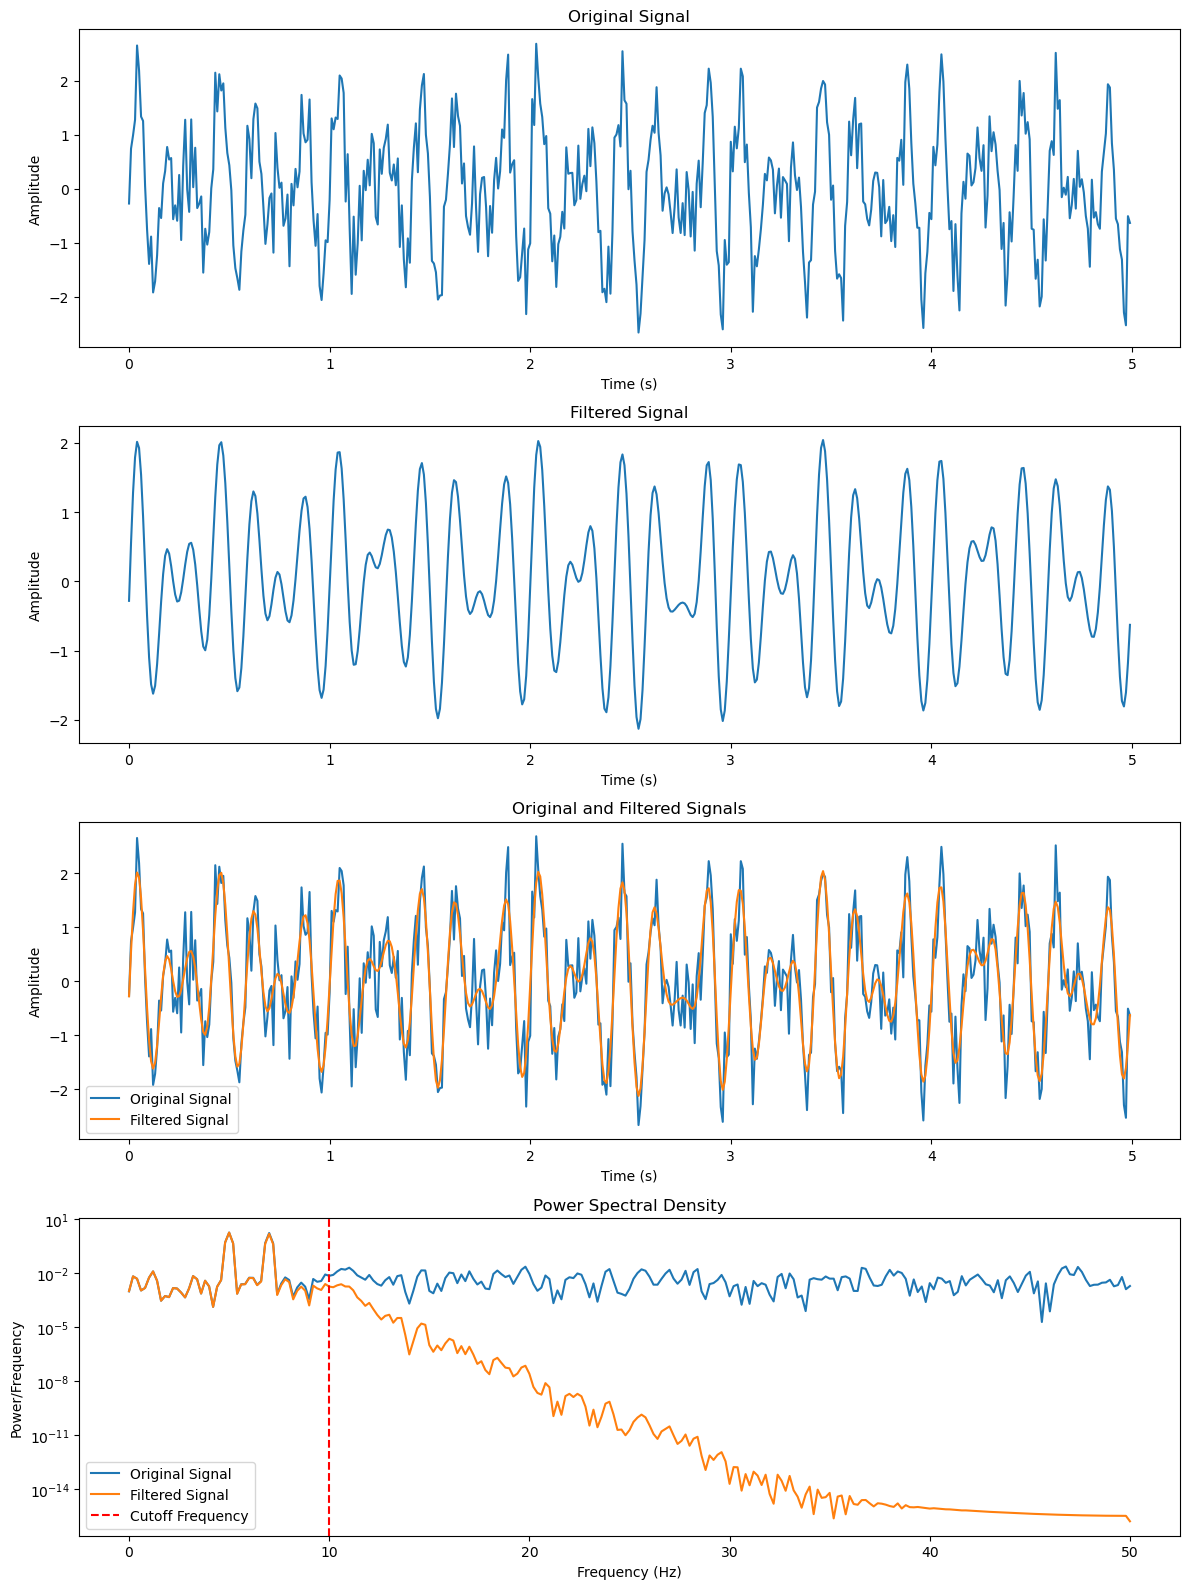

In [5]:
# Define the sampling rate and duration
sr = 100  # Sampling rate in Hz
duration = 5  # Duration in seconds

# Generate the time vector
t = np.linspace(0, duration, duration * sr, endpoint=False)

# Define the frequency and amplitude of the sine waves
freq1 = 5  # Hz
freq2 = 7  # Hz
amp1 = 1  # Amplitude in arbitrary units
amp2 = 1  # Amplitude in arbitrary units

# Generate the sinusoidal time series data with added noise
data = amp1 * np.sin(2 * np.pi * freq1 * t) + amp2 * np.sin(2 * np.pi * freq2 * t) + np.random.normal(0, 0.5, size=len(t))

# Define the cutoff frequency and order of the Butterworth filter
cutoff = 10  # Hz
order = 4

# Design the Butterworth filter
b, a = signal.butter(order, cutoff/(sr/2), 'lowpass')

# Apply the filter to the data
filtered = signal.filtfilt(b, a, data)

# Compute the power spectral density (PSD) of the original and filtered signals
freqs, psd_data = signal.welch(data, sr, nperseg=1024)
_, psd_filtered = signal.welch(filtered, sr, nperseg=1024)

# Plot the original and filtered signals
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

# Plot the original signal
axs[0].plot(t, data)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

# Plot the filtered signal
axs[1].plot(t, filtered)
axs[1].set_title('Filtered Signal')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

# Plot the superimposed original and filtered signals
axs[2].plot(t, data, label='Original Signal')
axs[2].plot(t, filtered, label='Filtered Signal')
axs[2].set_title('Original and Filtered Signals')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

# Plot the power spectral density of the original and filtered signals
axs[3].semilogy(freqs, psd_data, label='Original Signal')
axs[3].semilogy(freqs, psd_filtered, label='Filtered Signal')
axs[3].axvline(x=cutoff, color='r', linestyle='--', label='Cutoff Frequency')
axs[3].set_title('Power Spectral Density')
axs[3].set_xlabel('Frequency (Hz)')
axs[3].set_ylabel('Power/Frequency')
axs[3].legend()

plt.tight_layout()
plt.show()